# TP1 Proximal Denoising

* Authors: Mengda Li, Ségolène Martin

## Question 1
Show that this problem amounts to calculate the proximity operator of a
function in $\Gamma_0$.

**_Claim1.1_**: $f \circ L \in \Gamma_0$



**Proof**:
> 1. Right composition of a convex function by an ffine function is still convex (Proposition 8.20). Since $f \in \Gamma_0$ and $L$ is linear (so affine), $f \circ L$ is convex.
2.  Right composition of a lower semicontinuous function by a continuous function is still lower semicontinuous (Lemma 1.28). Since $f$ is lower semicontinuous and $L$ is continuous (linear and the dimension of its set of departure is finite), $f \circ L$ is lower semicontinuous.
3. $f \circ L$ is clearly proper.

As $f \circ L \in \Gamma_0$, Prox$_{f\circ L}: y \ \mapsto \ \underset{x}{\arg\min} f(Lx) + \frac{1}{2} \|x - y \|^2$ is our goal of optimization problem.

## Question 2
Check that this is also equivalent to calculate $L^{−1} Prox_f (Ly)$.

As $L$ is linear and continuous, $f \in \Gamma_0$, and $LL^* = Id$, (by Proposition 24.14) $Prox_{f \circ L} (y) = y + L^*(Prox_f(Ly) -Ly)$

\begin{align}
Prox_{f \circ L} (y) &= y + L^*(Prox_f(Ly) -Ly) \\
    & = y + L^*(Prox_f(Ly)) - y  \tag*{$(L^*L = Id)$}\\
    & = L^{-1}(Prox_f(Ly)) \tag*{$(L^* = L^{-1})$ }
\end{align}

## Question 3
Download the florence.jpg image. Add to this image a white Gaussian noise
with zero-mean and standard deviation equal to 30.

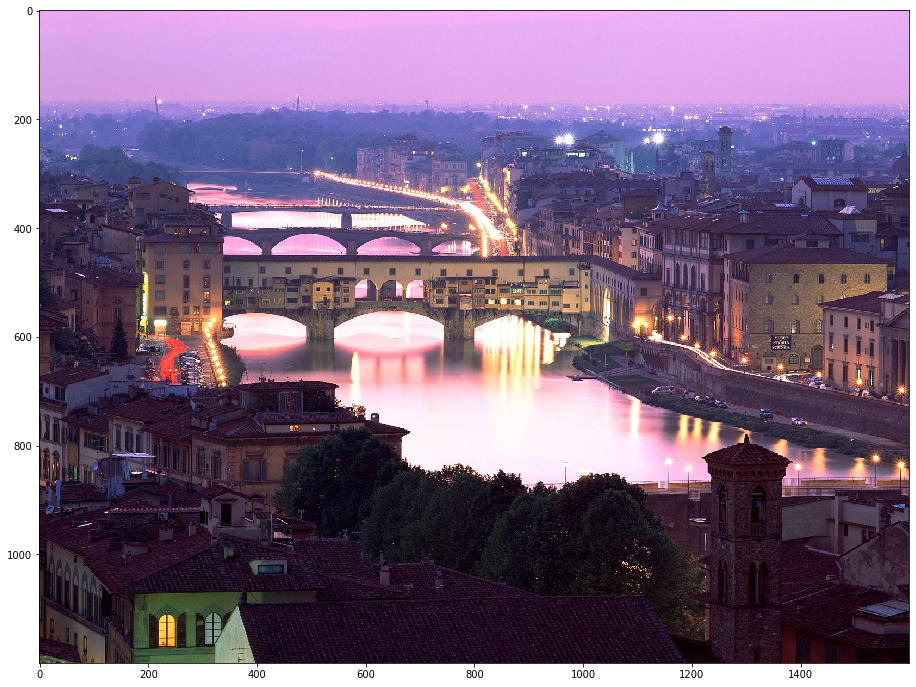

In [3]:
import imageio
im = imageio.imread('./florence.jpg')

import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


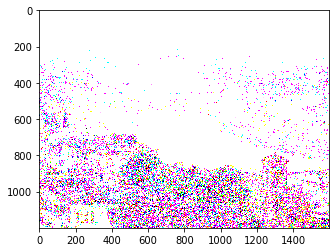

In [6]:
import numpy as np
noised = im + np.random.normal(scale = 30, size = im.shape)
noised = np.clip(noised, 0, 255).astype(int)

import matplotlib.pyplot as plt
plt.imshow(noised)

## Question 3 Version 2

In [5]:
import cv2
import pylab as plt
plt.rcParams['figure.figsize'] = [10, 5]
import numpy as np

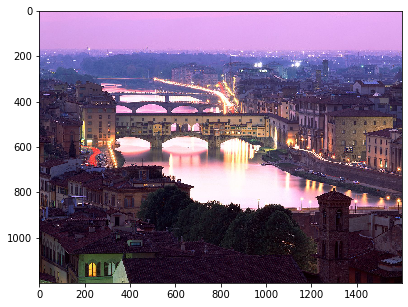

In [6]:
image = cv2.imread('florence.jpg')
image = np.asarray(image, dtype=np.uint8)
im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()


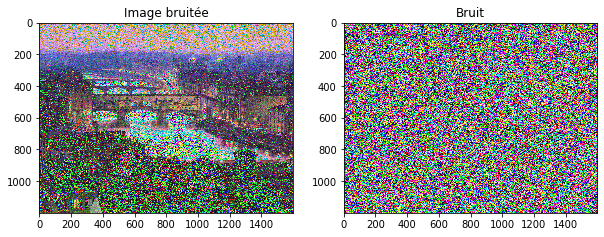

In [7]:
sigma = 30
[nx,ny,nz] = im.shape
#im_bruit = im + np.random.normal(0,30, (nx,ny))
im_bruit = np.zeros((nx, ny, 3))
im_bruit.shape
im_bruit[:,:,0] = np.add(im[:,:,0], np.random.normal(0,sigma, (nx,ny)))
im_bruit[:,:,1] = np.add(im[:,:,1], np.random.normal(0,sigma, (nx,ny)))
im_bruit[:,:,2] = np.add(im[:,:,2], np.random.normal(0,sigma, (nx,ny)))

plt.subplot(1,2,1)
plt.imshow(im_bruit.astype(np.uint8))
plt.title("Image bruitée")
plt.subplot(1,2,2)
plt.imshow((im_bruit-im).astype(np.uint8))
plt.title("Bruit")
plt.show()

## Question 4

Compute the minimizer of (1) when L is a 2D orthonormal wavelet decomposition.